**The goal**: To use tensorflow and find out given the an image of a galxy (from SDSS), whether the galaxy is spiral or elliptical.

The idea is to use a convolution neural network which are multi layer neural network whose input is considered to be images.

Code by Akash

In [1]:
#import required libraries
import pandas as pd
import numpy as np

#for plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

Import a simple sequnecial model and the required CNN models 

In [2]:
#import the sequencial model
from tensorflow.keras.models import Sequential

#import the core layers
from tensorflow.keras.layers import Dense, Flatten

#import CNN layers to help train image data
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#create the model
model = Sequential()

#first convolutional layer. A RGB image will have a depth of 3
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#define the maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

#layer to flatten the data
model.add(Flatten())

#more layers
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

#complie the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
#import the data
import sys
path_to_data = 'img_data/'
sys.path.insert(1, path_to_data)

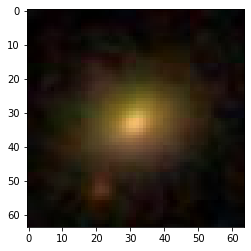

In [6]:
#take a quick look at one of the image
from PIL import Image
im = Image.open(path_to_data+'Training/Elliptical/img_1.jpeg')
plt.imshow(im)

In [7]:
#preprocess the images
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1./255)

#define the training and test set
training_img_set = train_data_gen.flow_from_directory(path_to_data + 'Training', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
test_img_set = test_data_gen.flow_from_directory(path_to_data + 'Testing',target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 1470 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


In [12]:
#train the model
model.fit(training_img_set, steps_per_epoch = 20, epochs = 10, validation_data = test_img_set, validation_steps = 100)

Epoch 1/10
20/20 [==============================] - 1s 65ms/step - loss: 0.1488 - accuracy: 0.9420
Epoch 2/10
20/20 [==============================] - 1s 67ms/step - loss: 0.1855 - accuracy: 0.9357
Epoch 3/10
20/20 [==============================] - 1s 66ms/step - loss: 0.1563 - accuracy: 0.9422
Epoch 4/10
20/20 [==============================] - 1s 65ms/step - loss: 0.1626 - accuracy: 0.9297
Epoch 5/10
20/20 [==============================] - 1s 64ms/step - loss: 0.1651 - accuracy: 0.9359
Epoch 6/10
20/20 [==============================] - 1s 65ms/step - loss: 0.1639 - accuracy: 0.9359
Epoch 7/10
20/20 [==============================] - 1s 66ms/step - loss: 0.1868 - accuracy: 0.9250
Epoch 8/10
20/20 [==============================] - 1s 65ms/step - loss: 0.1752 - accuracy: 0.9248
Epoch 9/10
20/20 [==============================] - 1s 66ms/step - loss: 0.1299 - accuracy: 0.9484
Epoch 10/10
20/20 [==============================] - 1s 64ms/step - loss: 0.1508 - accuracy: 0.9357


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 31, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [14]:
score = model.evaluate(training_img_set)

46/46 [==============================] - 3s 65ms/step - loss: 0.1455 - accuracy: 0.9374


#### Note :
The data was provided by Ashish Mahabal during the 7BISS (2020) summer school.